## Curating the data

### Sort the maxima found from each core

In [1]:
### IMPORTS ###
import sys
sys.path.append('../')

import pickle
from operator import itemgetter

## Extract the optimisation result ##
num_cores = 32
maxfev = 5000 

pkl_fname = f'./Data/FOM_5th_bounds3_optimisation_maxfev{maxfev*num_cores}.pkl'
txt_fname = f'./Data/FOM_5th_bounds3_optimisation_maxfev{maxfev*num_cores}_curated.txt'

with open(pkl_fname, 'rb') as data_file:
    data = pickle.load(data_file)


## Sort the maxima and maximisers based on value ##
opt_FOMs = data["FOM"]
opt_gratings = data["Optimised grating"]
opt_params = data["Optimised parameters"] #[0]
# # opt_params = [grating.params for grating in opt_gratings]

maxima_and_maximisers = zip(opt_FOMs, opt_params)
maxima_and_gratings = zip(opt_FOMs, opt_gratings)

# Sort all local maxima from largest to smallest
maxima_and_maximisers_sorted = sorted(maxima_and_maximisers, key=itemgetter(0), reverse=True)
opt_gratings_sorted = sorted(maxima_and_gratings, key=itemgetter(0), reverse=True)

### Write the sorted maxima to file

In [2]:
# Results to file
lines_to_file = ["\n------------------------------------------------------------------------------------------------------------------------------------\n"
                , f"All maxima | (local maximum, local maximiser)\n"]

with open(txt_fname, "a") as result_file:
    result_file.writelines(lines_to_file)
    
    for idx, maxima_and_maximiser in enumerate(maxima_and_maximisers_sorted):
        result_file.write(f"Max no. {idx} | {maxima_and_maximiser}\n")

    result_file.write("------------------------------------------------------------------------------------------------------------------------------------\n")

## Check maximum FoM

In [2]:
max(data['FOM'])

np.float64(9.185911812462664e-14)

## Extract optimal grating

In [2]:
import numpy as np
import os
os.environ["OMP_NUM_THREADS"] = "1" 
os.environ["OPENBLAS_NUM_THREADS"] = "1" 
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["VECLIB_MAXIMUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 

from parameters import D1_ND

# (3) 1/0.88

optimum_number = 19 # maxfev=1000: optimum 8, #(4), (8) for 3rd FoM
params=maxima_and_maximisers_sorted[optimum_number][1]

# Test optimum convergence
wavelength  = 1.
angle       = 0.
Nx          = 100 #100
nG          = 25
Qabs        = np.inf

## Rebuild grating if necessary
from twobox import TwoBox as Bigrating
grating_pitch   = params[0] 
grating_depth   = params[1]
box1_width      = params[2]
box2_width      = params[3]
box_centre_dist = params[4]
box1_eps        = params[5]
box2_eps        = params[6]

gaussian_width  = params[7]
substrate_depth = params[8]
substrate_eps   = params[9]

grating = Bigrating(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                    gaussian_width, substrate_depth, substrate_eps, 
                    wavelength, angle, Nx, nG, Qabs)

# Grating parameters
print("grating_pitch:   ",grating.params[0])
print("grating_depth:   ",grating.params[1])
print("box1_width:      ",grating.params[2])
print("box2_width:      ",grating.params[3])
print("box_centre_dist: ",grating.params[4])
print("box1_eps:        ",grating.params[5])
print("box2_eps:        ",grating.params[6])
print("gaussian_width:  ",grating.params[7])
print("substrate depth: ",grating.params[8])
print("substrate eps:   ",grating.params[9])

print("\nFoM:           ",maxima_and_maximisers_sorted[optimum_number][0])
# print("m=2:             ", 2/grating_pitch)

grating_pitch:    1.2898203125
grating_depth:    0.31338439941406243
box1_width:       0.19207031249999426
box2_width:       0.42488281250000065
box_centre_dist:  0.4161523437500003
box1_eps:         8.617187499999986
box2_eps:         2.8359375000000044
gaussian_width:   36.81640625
substrate depth:  0.3141992187499263
substrate eps:    10.179687499999975

FoM:            6.915959556663907e-17


## Ilic grating

In [6]:
import sys
sys.path.append('../')
from parameters import D1_ND
from twobox import TwoBox as Bigrating
import numpy as np
wavelength=1.5 / D1_ND(5.3/100)

grating_pitch=1.8 / wavelength
grating_depth=0.5 / wavelength
box1_width=0.15 * grating_pitch
box2_width=0.35 * grating_pitch
box_centre_dist=0.60 * grating_pitch
box1_eps = 3.5**2 
box2_eps = 3.5**2
gaussian_width=2 * 10
substrate_depth=0.5 / wavelength
substrate_eps=1.45**2

wavelength  = 1.
angle       = 0.
Nx          = 100
nG          = 25
Qabs        = np.inf

grating = Bigrating(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                    gaussian_width, substrate_depth, substrate_eps, 
                    wavelength, angle, Nx, nG, Qabs)

### Plot the optimal grating spectrum

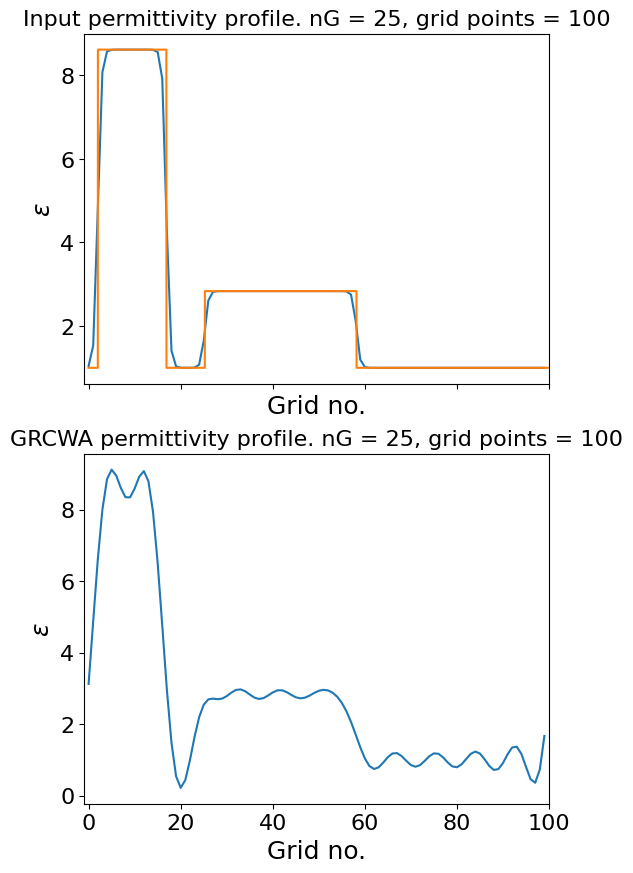

(<Figure size 684.055x577.428 with 1 Axes>,
 <Axes: title={'center': "$h_1' = 0.313\\lambda_0$, $\\Lambda' = 1.290\\lambda_0$"}, xlabel="$\\lambda'/\\Lambda'$", ylabel='FoM'>)

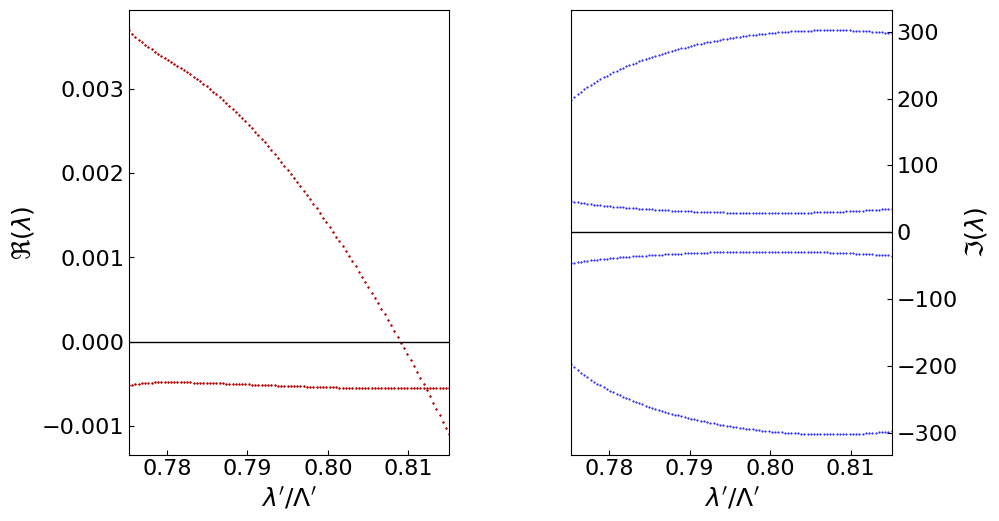

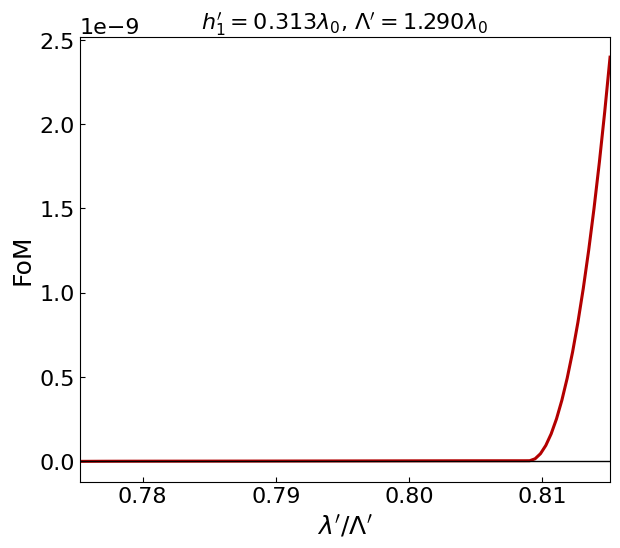

In [6]:
_, _, p_fig, p_ax = grating.show_permittivity(show_analytic_box=True)

angle = 0.
quantity = "eig" # quantity to plot
wavelength_range = [1,1/D1_ND([5/100,0])]
n_plot = 100

grating.show_Eigs('o',False, False, wavelength_range, n_plot)
# grating.show_spectrum(angle, "eig", wavelength_range, n_plot)
grating.show_spectrum(angle, "FoM", wavelength_range, n_plot)


In [5]:
# grating.wavelength = 1.05
grating.FoM(10e9,"grad")

np.float64(-3.687497972438103e-12)

In [186]:
def ang(m, wavelength, pitch):
    return np.arcsin(1 - m*wavelength/pitch)*(180/np.pi)

pitch_min = np.round(1.001*wavelength/D1_ND([5/100,0.]),3)
print(pitch_min)

pitch_max = np.round( 2/( 1 + np.sin(20*(np.pi/180)) ), 3)
print(pitch_max)

angle_1 = ang(1, 1.05, pitch_min)
angle_2 = ang(2, 1.05, pitch_min)
print("Minimum:")
print("v=0")
print("1st order cutoff: ", ang(1, 1, pitch_min) )
print("2nd order cutoff: ", ang(2, 1, pitch_min))
print("v=5%c")
print("1st order cutoff: ", ang(1, 1.05, pitch_min) )
print("2nd order cutoff: ", ang(2, 1.05, pitch_min))
print()

print("Maximum")
print("v=0")
print("1st order cutoff: ", ang(1, 1, pitch_max) )
print("2nd order cutoff: ", ang(2, 1, pitch_max))
print("v=5%c")
print("1st order cutoff: ", ang(1, 1.05, pitch_max) )
print("2nd order cutoff: ", ang(2, 1.05, pitch_max))

1.105
1.49
Minimum:
v=0
1st order cutoff:  5.452621987812531
2nd order cutoff:  -54.091510715799544
v=5%c
1st order cutoff:  2.8530049760357548
2nd order cutoff:  -64.21760874251255

Maximum
v=0
1st order cutoff:  19.19953973390833
2nd order cutoff:  -20.015959602882678
v=5%c
1st order cutoff:  17.17564829679718
2nd order cutoff:  -24.166896427401976


In [299]:
print("1st order:", cutoff)
print("2nd order:", cutoff2)

1st order: 6.965111976290246
2nd order: -49.24167248465887


In [301]:
print("1st order:", cutoff)
print("2nd order:", cutoff2)

1st order: 5.578530934148003
2nd order: -53.66631105821649


## Diffraction efficiencies +  Efficiency factors

Text(0.5, 0.98, "Efficiency factors at $\\lambda'=$ 1.05")

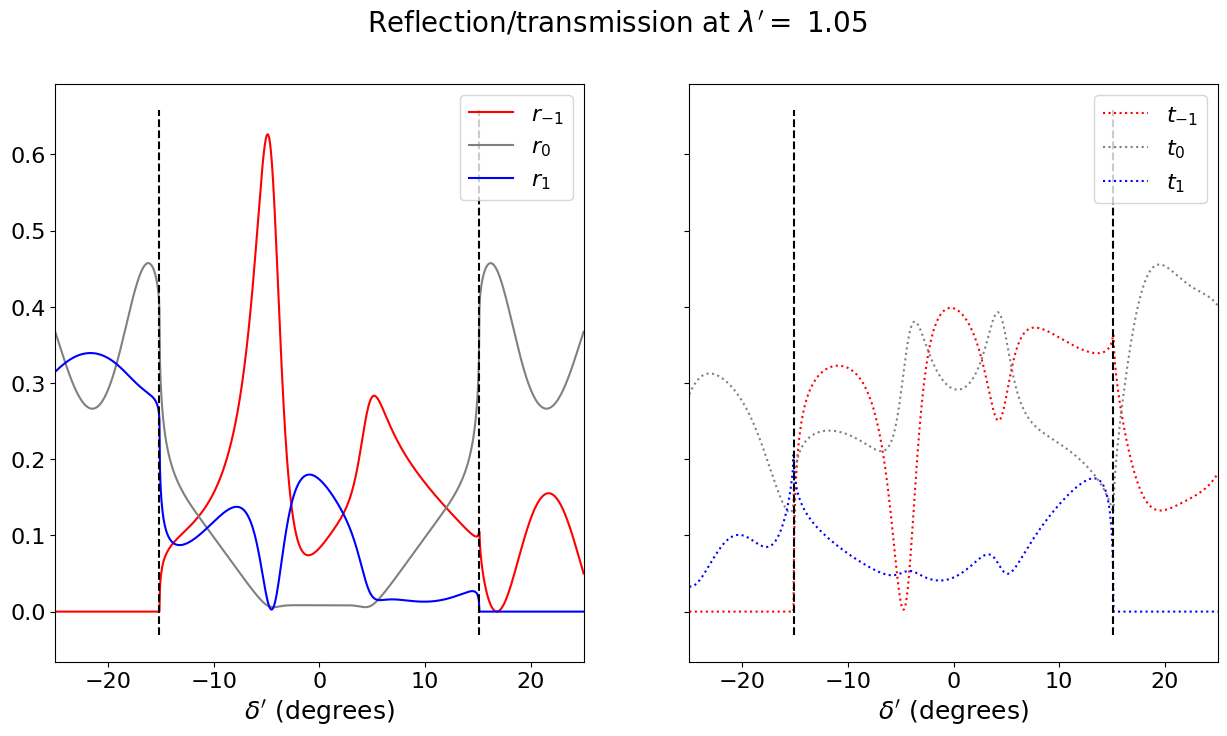

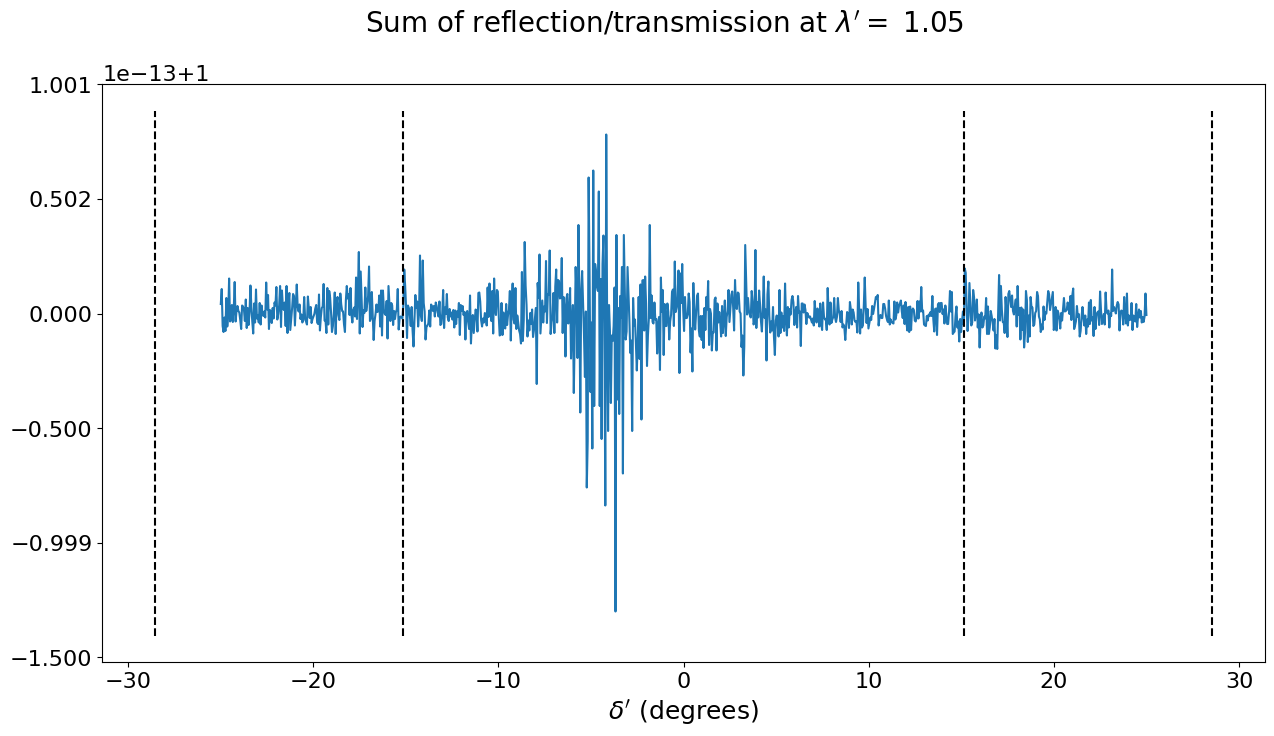

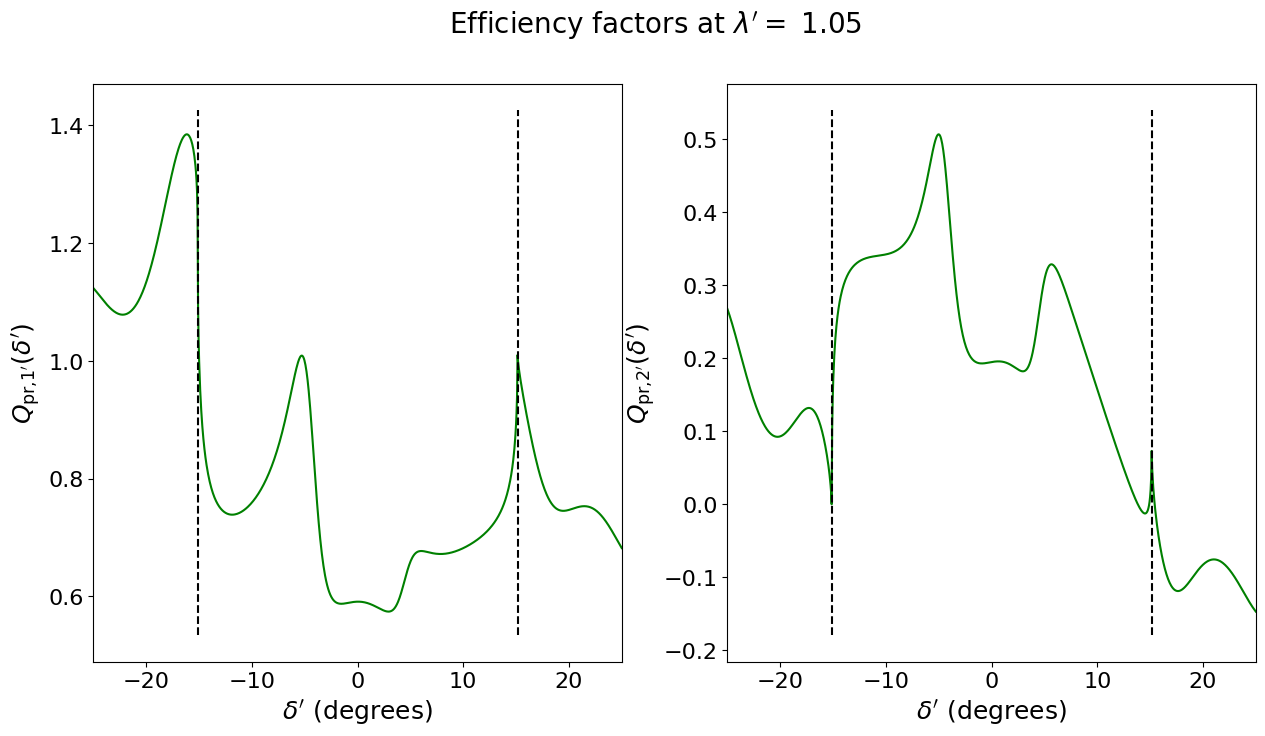

In [5]:
def Q(angle, r, t):
    def beta_m(m):
        test=(np.sin(angle)+m*wavelength/grating_pitch)
        if abs(test)>=1:
            delta_m="no_diffraction_order"
        else:
            delta_m=np.arcsin(test)
        return delta_m
    Q1=0
    Q2=0
    M=[-1,0,1]
    for m in range(len(M)):
        delta_m=beta_m(M[m])
        if isinstance(delta_m,str):
            Q1=Q1+0
            Q2=Q2+0
        else:
            Q1=Q1+ r[m]*(1+np.cos(angle+delta_m))+t[m]*(1-np.cos(delta_m-angle))
            Q2=Q2+ r[m]*np.sin(angle+delta_m)+t[m]*np.sin(delta_m-angle)
    Q1=np.cos(angle)*Q1
    Q2=-np.cos(angle)*Q2
    return Q1,Q2

import matplotlib.pyplot as plt
wavelength = 1/D1_ND(5/100)
k = 1000
angles = (np.pi/180)*np.linspace(-25,25,k)

Q1_array = []
Q2_array = []

Rs = [] 
Ts = [] 

grating.wavelength = wavelength
for i in range(k):
    angle = angles[i]
    grating.angle = angle
    r, t = grating.eff()

    Rs.append(r)
    Ts.append(t)

    Q1, Q2 = Q(angle, r, t)
    Q1_array.append(Q1)
    Q2_array.append(Q2)

Q1_array = np.array(Q1_array)
Q2_array = np.array(Q2_array)
Rs = np.array(Rs)
Ts = np.array(Ts)

#### Plotting
cutoff = np.arcsin( 1 - wavelength / grating_pitch) * (180/np.pi)
cutoff2_test = 1 - 2* wavelength / grating_pitch
order_2 = False
if np.abs(cutoff2_test)<1:
    order_2 = True
    cutoff2 = np.arcsin(cutoff2_test) * (180/np.pi)


##############################
## Reflection/transmission
fig1, (ax, ax_) = plt.subplots(nrows=1, ncols=2, sharey=True)
ax.plot((180/np.pi)*angles, Rs[:,0], color="red",                       label="$r_{-1}$")
ax_.plot((180/np.pi)*angles, Ts[:,0], color="red", linestyle="dotted",  label="$t_{-1}$")
ax.plot((180/np.pi)*angles, Rs[:,1], color="grey",                      label="$r_{0}$")
ax_.plot((180/np.pi)*angles, Ts[:,1], color="grey", linestyle="dotted", label="$t_{0}$")
ax.plot((180/np.pi)*angles, Rs[:,2], color="blue",                      label="$r_{1}$")
ax_.plot((180/np.pi)*angles, Ts[:,2], color="blue", linestyle="dotted", label="$t_{1}$")

ax.legend()
ax_.legend()

ax_ylims = ax.get_ylim()
ax__ylims = ax_.get_ylim()
ax.set_xlim(xmin=(180/np.pi)*angles[0], xmax=(180/np.pi)*angles[-1])
ax_.set_xlim(xmin=(180/np.pi)*angles[0], xmax=(180/np.pi)*angles[-1])

ax.vlines(x= cutoff, ymin=ax_ylims[0], ymax=ax_ylims[1], color='black', linestyle = 'dashed')
ax.vlines(x=-cutoff, ymin=ax_ylims[0], ymax=ax_ylims[1], color='black', linestyle = 'dashed')
ax_.vlines(x= cutoff, ymin=ax__ylims[0], ymax=ax__ylims[1], color='black', linestyle = 'dashed')
ax_.vlines(x=-cutoff, ymin=ax__ylims[0], ymax=ax__ylims[1], color='black', linestyle = 'dashed')
if order_2:
    ax.vlines(x= cutoff2, ymin=ax_ylims[0], ymax=ax_ylims[1], color='black', linestyle = 'dashed')
    ax.vlines(x=-cutoff2, ymin=ax_ylims[0], ymax=ax_ylims[1], color='black', linestyle = 'dashed')
    ax_.vlines(x= cutoff2, ymin=ax__ylims[0], ymax=ax__ylims[1], color='black', linestyle = 'dashed')
    ax_.vlines(x=-cutoff2, ymin=ax__ylims[0], ymax=ax__ylims[1], color='black', linestyle = 'dashed')

ax.set_xlabel("$\delta'$ (degrees)")
ax_.set_xlabel("$\delta'$ (degrees)")
fig1.suptitle(rf"Reflection/transmission at $\lambda'=$ {wavelength:.2f}")

##############################
## Sum
fig, ax1 = plt.subplots(nrows=1, ncols=1)
ax1.plot((180/np.pi)*angles, Rs[:,0]+Rs[:,1]+Rs[:,2] + Ts[:,0]+Ts[:,1]+Ts[:,2])
ax_ylims = ax1.get_ylim()
ax1.vlines(x= cutoff, ymin=ax_ylims[0], ymax=ax_ylims[1], color='black', linestyle = 'dashed')
ax1.vlines(x=-cutoff, ymin=ax_ylims[0], ymax=ax_ylims[1], color='black', linestyle = 'dashed')
if order_2:
    ax1.vlines(x= cutoff2, ymin=ax_ylims[0], ymax=ax_ylims[1], color='black', linestyle = 'dashed')
    ax1.vlines(x=-cutoff2, ymin=ax_ylims[0], ymax=ax_ylims[1], color='black', linestyle = 'dashed')
ax1.set_xlabel("$\delta'$ (degrees)")
fig.suptitle(rf"Sum of reflection/transmission at $\lambda'=$ {wavelength:.2f}")

##############################
## Efficiency factors
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot((180/np.pi)*angles, Q1_array,       color="green",    label="GRCWA")
ax2.plot((180/np.pi)*angles, Q2_array,       color="green",    label="GRCWA")
ax1.set_xlim(xmin=(180/np.pi)*angles[0], xmax=(180/np.pi)*angles[-1])
ax2.set_xlim(xmin=(180/np.pi)*angles[0], xmax=(180/np.pi)*angles[-1])

ax1_ylims = ax1.get_ylim()
ax2_ylims = ax2.get_ylim()

ax1.vlines(x= cutoff, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
ax1.vlines(x=-cutoff, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
ax2.vlines(x= cutoff, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')
ax2.vlines(x=-cutoff, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')
if order_2:
    ax1.vlines(x= cutoff2, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
    ax1.vlines(x=-cutoff2, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
    ax2.vlines(x= cutoff2, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')
    ax2.vlines(x=-cutoff2, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')

ax1.set_xlabel("$\delta'$ (degrees)")
ax1.set_ylabel("$Q_{\\text{pr,1}'} (\delta')$")
ax2.set_xlabel("$\delta'$ (degrees)")
ax2.set_ylabel("$Q_{\\text{pr,2}'} (\delta')$")

fig.suptitle(rf"Efficiency factors at $\lambda'=$ {wavelength:.2f}")


In [201]:
def eff(self):
    """
    Calculate up to -1 <= m <= 1 orders' reflection/transmission for the twobox.
    """
    self.init_RCWA()
    R_byorder,T_byorder = self.RCWA.RT_Solve(normalize=1, byorder=1)
    Fourier_orders = self.RCWA.G

    Rs = []
    Ts = []
    RT_orders = [-2,-1,0,1,2]
    # IMPORTANT: have to use append method to a list rather than index assignment
    # Else, autograd will throw a TypeError with float() argument being an ArrayBox
    for order in RT_orders:
        Rs.append(np.sum(R_byorder[Fourier_orders[:,0]==order]))
        Ts.append(np.sum(T_byorder[Fourier_orders[:,0]==order]))

    return Rs,Ts
grating.angle = 9*(np.pi/180)
eff(grating)[0]

[np.float64(2.8456503678843433e-19),
 np.float64(0.042458767581310876),
 np.float64(0.1265447437046435),
 np.float64(0.008305742106692706),
 np.float64(3.0256209126425846e-19)]

In [202]:
grating.angle= 0 
grating.return_Qs_auto(False)

(np.float64(-2.036198990885003),
 np.float64(0.4268981528458229),
 np.float64(2.463142664183348),
 np.float64(0.23583730571973102))

## First derivatives

Text(0.5, 0.98, "$\\frac{\\partial Q}{\\partial \\lambda'}$ at $\\lambda'=$1.00")

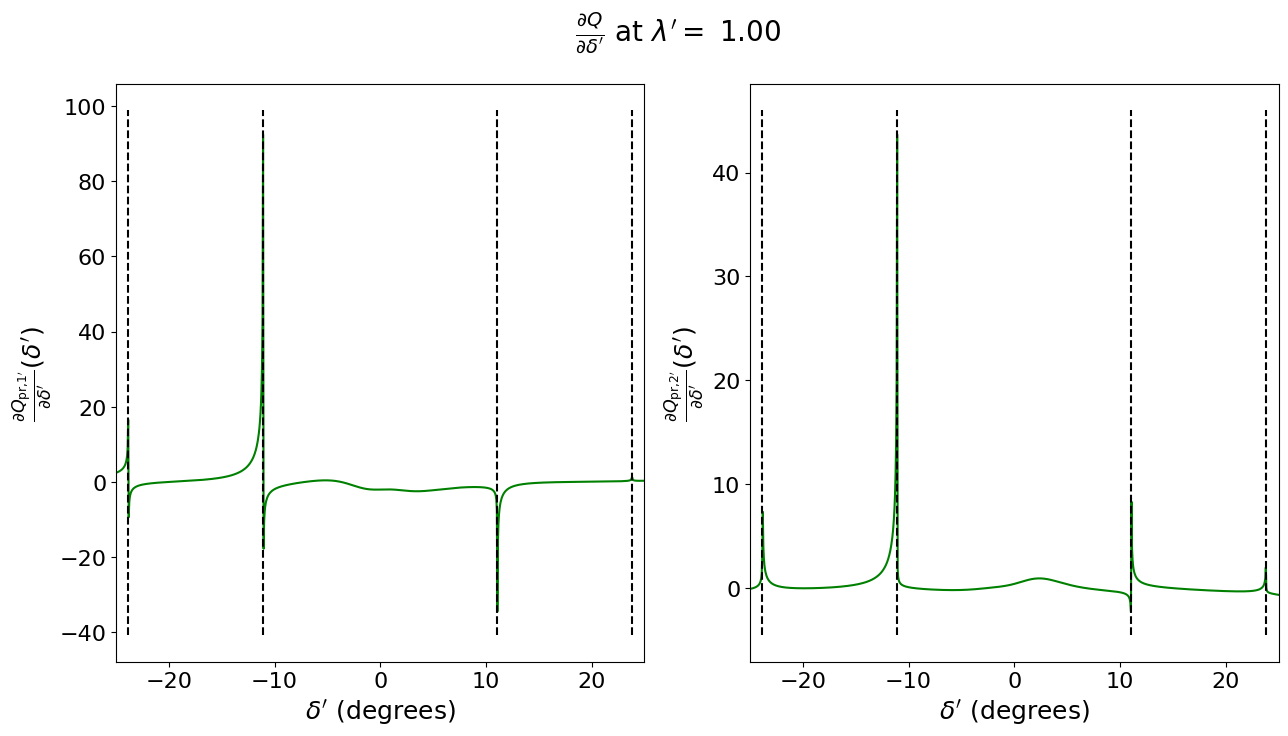

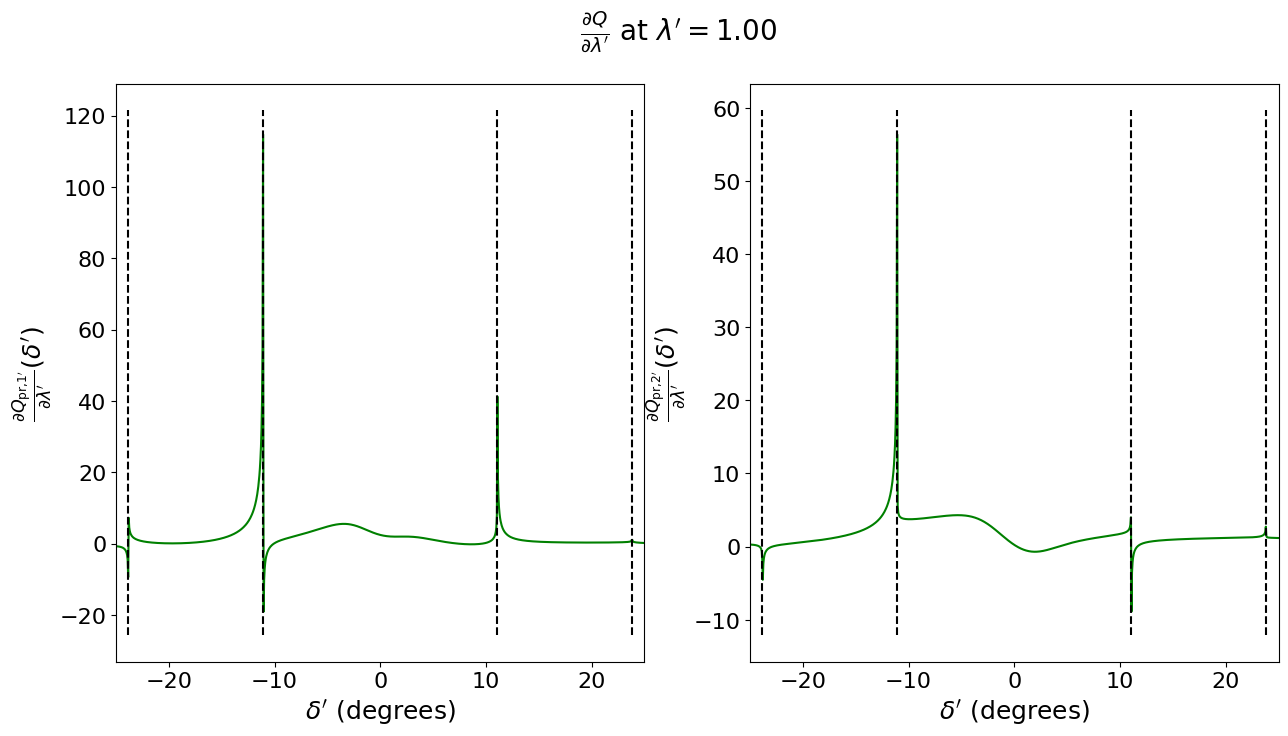

In [204]:
import matplotlib.pyplot as plt
wavelength = 1.00
k = 1000
angles = (np.pi/180)*np.linspace(-25,25,k)

PD_angle_Q1_array = []
PD_angle_Q2_array = []

PD_wavelength_Q1_array = []
PD_wavelength_Q2_array = []

grating.wavelength = wavelength
for i in range(k):
    angle = angles[i]
    grating.angle = angle
    PD_angle_Q1, PD_angle_Q2, PD_wavelength_Q1, PD_wavelength_Q2 = grating.return_Qs_auto(return_Q=False)

    PD_angle_Q1_array.append(PD_angle_Q1)
    PD_angle_Q2_array.append(PD_angle_Q2)
    PD_wavelength_Q1_array.append(PD_wavelength_Q1)
    PD_wavelength_Q2_array.append(PD_wavelength_Q2)

PD_angle_Q1_array = np.array(PD_angle_Q1_array)
PD_angle_Q2_array = np.array(PD_angle_Q2_array)
PD_wavelength_Q1_array = np.array(PD_wavelength_Q1_array)
PD_wavelength_Q2_array = np.array(PD_wavelength_Q2_array)

#### Plotting
#### Plotting
cutoff = np.arcsin( 1 - wavelength / grating_pitch) * (180/np.pi)
cutoff2_test = 1 - 2* wavelength / grating_pitch
order_2 = False
if np.abs(cutoff2_test)<1:
    order_2 = True
    cutoff2 = np.arcsin(cutoff2_test) * (180/np.pi)


## Angular derivatives
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot((180/np.pi)*angles, PD_angle_Q1_array,       color="green",    label="GRCWA")
ax2.plot((180/np.pi)*angles, PD_angle_Q2_array,       color="green",    label="GRCWA")
ax1.set_xlim(xmin=(180/np.pi)*angles[0], xmax=(180/np.pi)*angles[-1])
ax2.set_xlim(xmin=(180/np.pi)*angles[0], xmax=(180/np.pi)*angles[-1])

ax1_ylims = ax1.get_ylim()
ax2_ylims = ax2.get_ylim()

ax1.vlines(x= cutoff, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
ax1.vlines(x=-cutoff, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
ax2.vlines(x= cutoff, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')
ax2.vlines(x=-cutoff, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')
if order_2:
    ax1.vlines(x= cutoff2, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
    ax1.vlines(x=-cutoff2, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
    ax2.vlines(x= cutoff2, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')
    ax2.vlines(x=-cutoff2, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')

ax1.set_xlabel("$\delta'$ (degrees)")
ax1.set_ylabel(r"$\frac{\partial Q_{\text{pr,1}'}}{\partial \delta'} (\delta')$")
ax2.set_xlabel("$\delta'$ (degrees)")
ax2.set_ylabel(r"$\frac{\partial Q_{\text{pr,2}'}}{\partial \delta'} (\delta')$")

fig.suptitle(t=(r"$\frac{\partial Q}{\partial \delta'}$ at $\lambda'=$"+rf" {wavelength:.2f}"))

## Wavelength derivatives
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot((180/np.pi)*angles, PD_wavelength_Q1_array,       color="green",    label="GRCWA")
ax2.plot((180/np.pi)*angles, PD_wavelength_Q2_array,       color="green",    label="GRCWA")
ax1.set_xlim(xmin=(180/np.pi)*angles[0], xmax=(180/np.pi)*angles[-1])
ax2.set_xlim(xmin=(180/np.pi)*angles[0], xmax=(180/np.pi)*angles[-1])

ax1_ylims = ax1.get_ylim()
ax2_ylims = ax2.get_ylim()

ax1.vlines(x= cutoff, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
ax1.vlines(x=-cutoff, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
ax2.vlines(x= cutoff, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')
ax2.vlines(x=-cutoff, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')
if order_2:
    ax1.vlines(x= cutoff2, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
    ax1.vlines(x=-cutoff2, ymin=ax1_ylims[0], ymax=ax1_ylims[1], color='black', linestyle = 'dashed')
    ax2.vlines(x= cutoff2, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')
    ax2.vlines(x=-cutoff2, ymin=ax2_ylims[0], ymax=ax2_ylims[1], color='black', linestyle = 'dashed')

ax1.set_xlabel("$\delta'$ (degrees)")
ax1.set_ylabel(r"$\frac{\partial Q_{\text{pr,1}'}}{\partial \lambda'} (\delta')$")
ax2.set_xlabel("$\delta'$ (degrees)")
ax2.set_ylabel(r"$\frac{\partial Q_{\text{pr,2}'}}{\partial \lambda'} (\delta')$")

fig.suptitle(t=(r"$\frac{\partial Q}{\partial \lambda'}$ at $\lambda'=$"+rf"{wavelength:.2f}"))
